# **CVPS20 // Galaxy Zoo Mini-Assignment**

assigned : **Oct 19, 2020**

DUE : **Oct 26, 2020 11:59pm**

## Classifying Galaxy Types with Supervised Learning

<img src="https://www.cabrillo.edu/~rnolthenius/astro8/GalZoo/TuningFork.jpg" width=500x>

---

The formation of galaxies over cosmic time results in a continuum of galaxy shapes from smooth "elliptical" galaxies to "spiral" galaxies like our own Milky Way.  Automated classification of galaxies in images from telescopes can inform large scale structure measurements that directly constrain models of cosmology and galaxy evolution.  In this assignment, you will train supervised learning models using "crowd-sourced" hand-labeling of galaxy types from the [Galaxy Zoo](http://zoo1.galaxyzoo.org/Default.aspx) project.

<b>

Rules for homeworks:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed in this notebook in the first cell below.  Direct copying from someone else's notebook is not permitted.

2. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

3. Late homeworks will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term (see CVPS20 syllabus).

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
plt.style.use("seaborn-dark")
plt.rcParams["figure.figsize"] = (16, 11)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd drive

/content/drive


In [5]:
cd My\ Drive

/content/drive/My Drive


In [6]:
cd cvps20/

/content/drive/My Drive/cvps20


In [7]:
cd data/galaxy_zoo/

/content/drive/My Drive/cvps20/data/galaxy_zoo


In [8]:
ls

galaxy_zoo_elliptical.npy  galaxy_zoo_spiral.npy


**Read in the images of elliptical and spiral galaxies from the `galaxy_zoo/` folder in `cvps20/data/`.**

In [9]:
elip = np.load('galaxy_zoo_elliptical.npy')
spiral = np.load('galaxy_zoo_spiral.npy')

In [10]:
elip.shape
print(f'{elip.shape[0]} images of eliptical galaxes of size {elip.shape[1]} x {elip.shape[2]}'.format())

5000 images of eliptical galaxes of size 106 x 106


In [11]:
print(f'{spiral.shape[0]} images of eliptical galaxes of size {spiral.shape[1]} x {spiral.shape[2]}'.format())

5000 images of eliptical galaxes of size 106 x 106


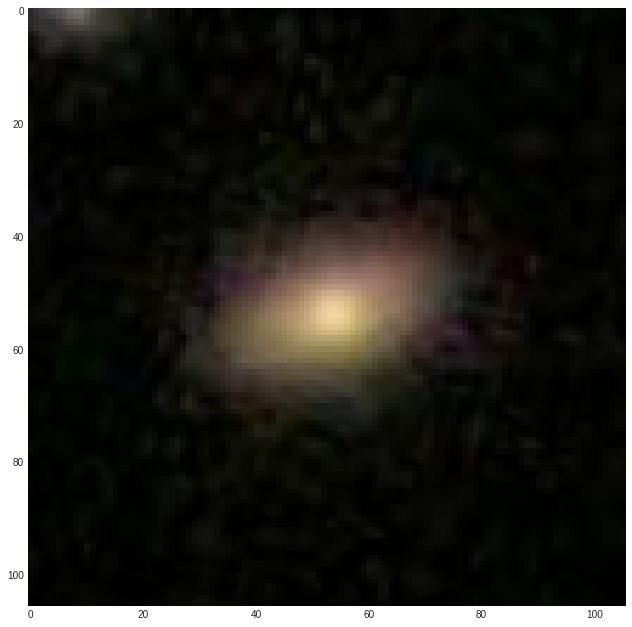

In [12]:
plt.imshow(elip[100,:,:,:])

**Convert each of the 5000 elliptical and 5000 spiral galaxy images to luminosity images (be sure to normalize to `0` to `1`).**

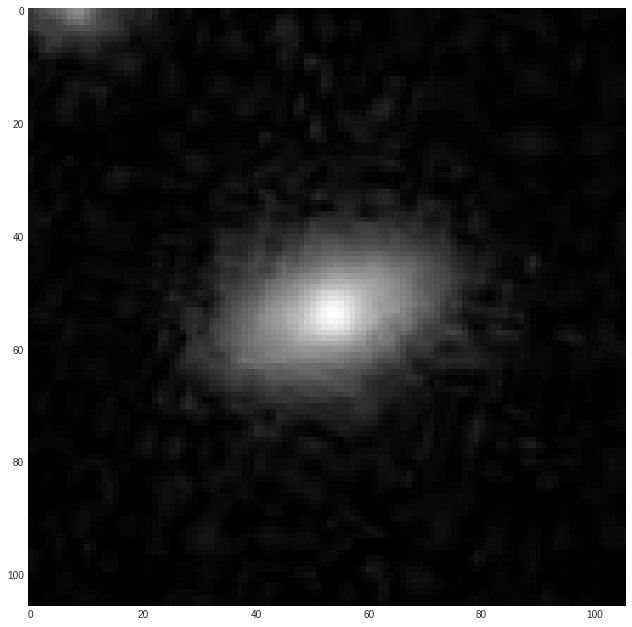

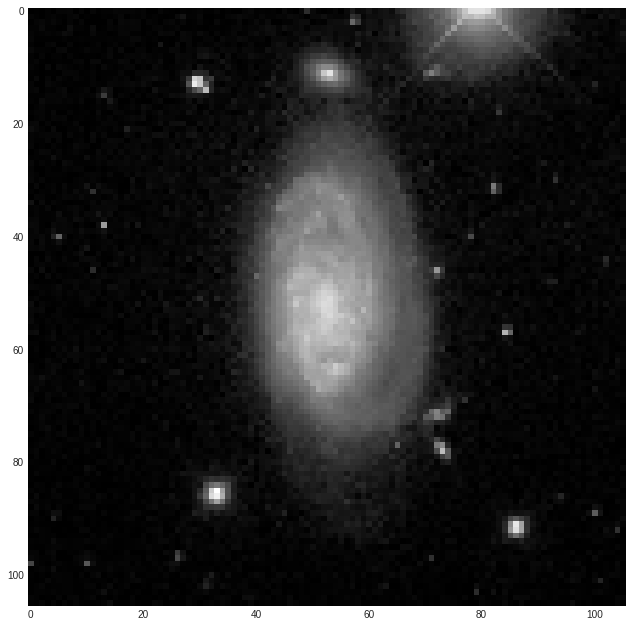

In [13]:
elipL = np.mean(elip, axis = 3)/255. #third axis is RGB
spiralL = np.mean(spiral, axis = 3)/255.
plt.imshow(elipL[100])
plt.show()
plt.imshow(spiralL[100])
plt.show()

**Make a 6x6 panel plot of the first 36 elliptcal galaxies in both RGB and in luminosity.**

Text(0.5, 0.98, '36 Eliptical Galaxies, Luminosity Image')

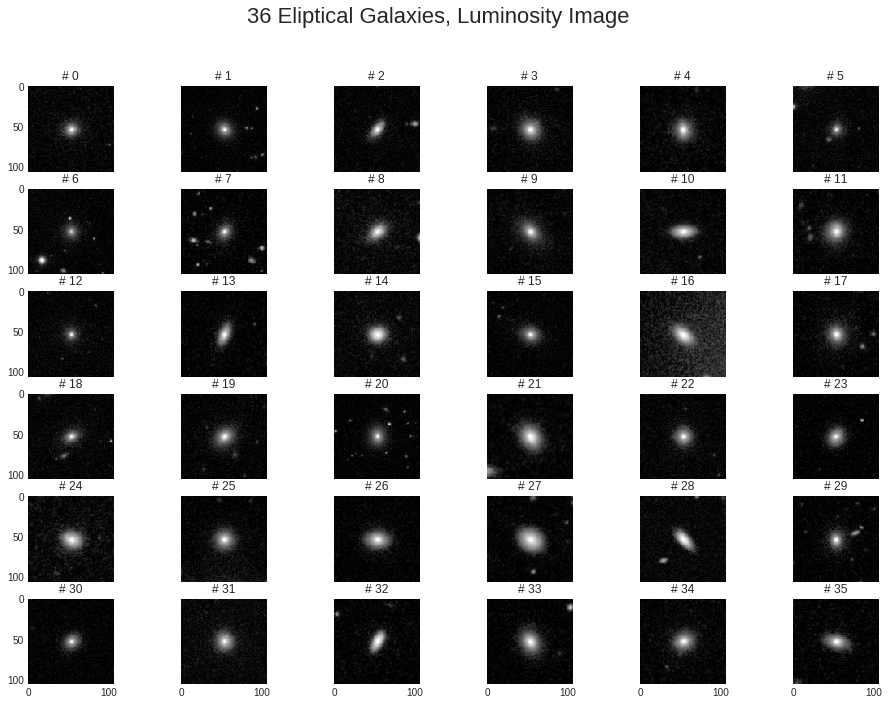

In [14]:
fig, axes = plt.subplots(6, 6, sharex = True, sharey = True)
for i in range(6):
  for j in range(6):
    axes[i, j].imshow(elipL[(6 * i)+j])
    axes[i,j].set_title('# %s' %((6 * i)+j))
fig.suptitle('36 Eliptical Galaxies, Luminosity Image', fontsize = 22)
#plt.tight_layout()

Text(0.5, 0.98, '36 Eliptical Galaxies, RGB Image')

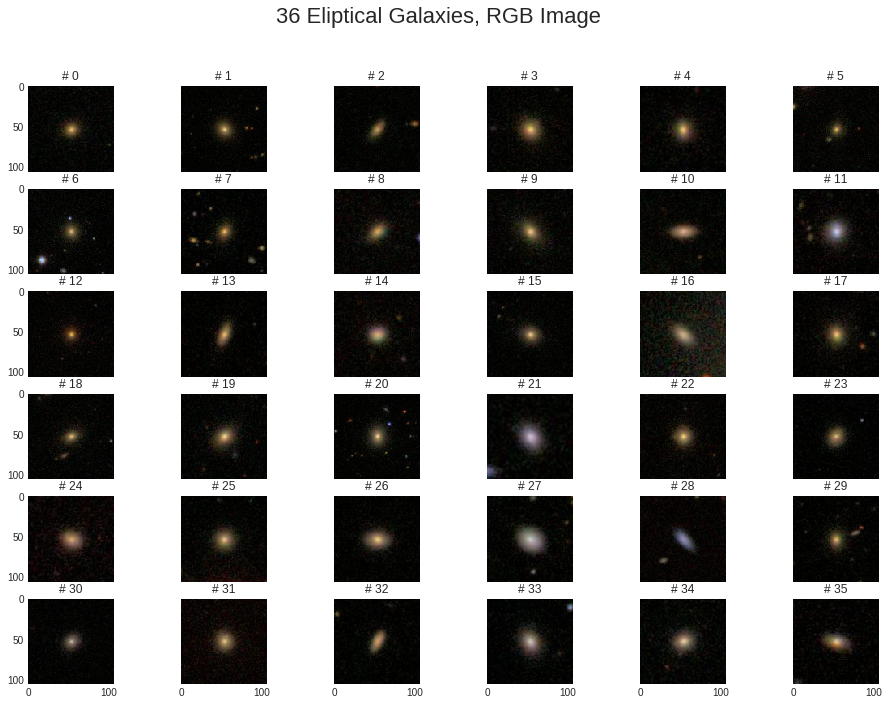

In [15]:
fig, axes = plt.subplots(6, 6, sharex = True, sharey = True)
for i in range(6):
  for j in range(6):
    axes[i, j].imshow(elip[(6 * i)+j])
    axes[i,j].set_title('# %s' %((6 * i)+j))
fig.suptitle('36 Eliptical Galaxies, RGB Image', fontsize = 22)

**Make a 6x6 panel plot of the first 36 spiral galaxies in both RGB and in luminosity.**

Text(0.5, 0.98, '36 Spiral Galaxies, Luminosity Image')

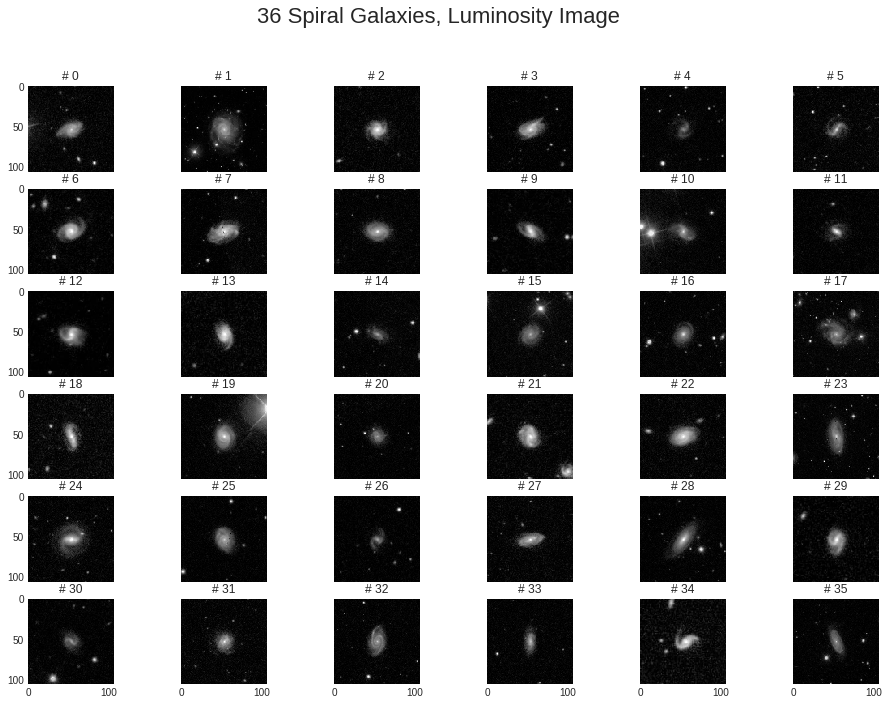

In [16]:
fig, axes = plt.subplots(6, 6, sharex = True, sharey = True)
for i in range(6):
  for j in range(6):
    axes[i, j].imshow(spiralL[(6 * i)+j])
    axes[i,j].set_title('# %s' %((6 * i)+j))
fig.suptitle('36 Spiral Galaxies, Luminosity Image', fontsize = 22)

Text(0.5, 0.98, '36 Spiral Galaxies, RGB Image')

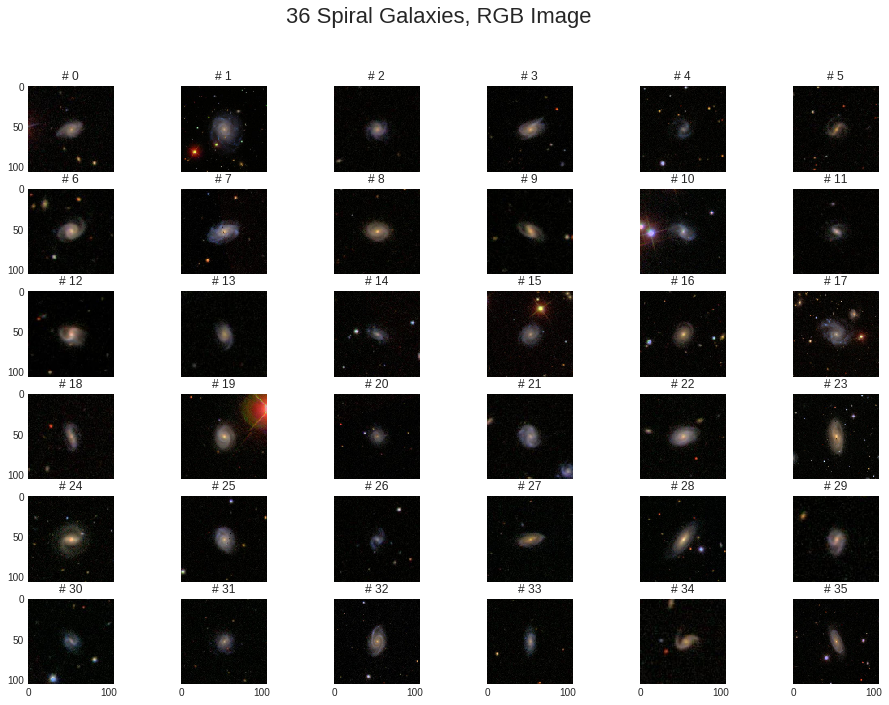

In [17]:
fig, axes = plt.subplots(6, 6, sharex = True, sharey = True)
for i in range(6):
  for j in range(6):
    axes[i, j].imshow(spiral[(6 * i)+j])
    axes[i,j].set_title('# %s' %((6 * i)+j))
fig.suptitle('36 Spiral Galaxies, RGB Image', fontsize = 22)

**Using the pixel luminosities of each image as features, train a decision tree classifier to classify elliptical vs spiral galaxies (attempting to minimize overfitting) and evaluate the model performance.$^{\dagger}$**

<small>$^{\dagger}$ Note, the full data set is quite large, you may want to reduce the total size of your training and testing set using the `train_size` and `test_size` keywords in the `train_test_split()` function. </small>

In [18]:
glxs = np.concatenate((elipL, spiralL))
#first 5000 are the eliptical Luminosity Galaxies, next 5000 are the spirals

In [19]:
nimg = glxs.shape[0]
nrow = glxs.shape[1]
ncol = glxs.shape[2]
feat = glxs.reshape(nimg, nrow * ncol).copy()
feat.shape

(10000, 11236)

In [20]:
targ = np.concatenate((np.full(5000, 0), np.full(5000, 1)))
#elipticals labeled 0, spirals labeled 1

In [23]:
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.2, random_state=302)

print("number of training examples : {0}".format(targ_tr.size))
print("number of testing examples  : {0}".format(targ_te.size))

number of training examples : 8000
number of testing examples  : 2000


In [24]:
param_dist = {"max_depth": [3, None],
              
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [27]:
dect = DecisionTreeClassifier(criterion = 'gini', min_samples_leaf = 8)

In [ ]:

print('CV code takes much longer, Im commenting it out')
# dect_cv = RandomizedSearchCV(dect, param_dist, cv=5)
# pred_tr = dect_cv.predict(feat_tr)
# pred_te = dect_cv.predict(feat_te)
# Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 8}
# print("Tuned Decision Tree Parameters: {}".format(dect_cv.best_params_))
# print("Best score is {}".format(dect_cv.best_score_))

In [28]:
dect.fit(feat_tr, targ_tr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
pred_tr = dect.predict(feat_tr)
pred_te = dect.predict(feat_te)

In [34]:
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))
print('Using CV params reduced overfitting')

training accuracy : 0.94725
testing accuracy : 0.8065
Using CV params reduced overfitting


**Again using the pixel luminosities of each image as features, train a multi-layer perceptron to classify elliptical vs spiral galaxies and evaluate the model performance.**


In [35]:
#feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ)
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.2, random_state=302)

print("number of training examples : {0}".format(targ_tr.size))
print("number of testing examples  : {0}".format(targ_te.size))

number of training examples : 8000
number of testing examples  : 2000


In [ ]:
#mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=500)
mlp = MLPClassifier(hidden_layer_sizes = (5), max_iter = 100)

In [44]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
print('Commenting htis out, once again took way too long, think I should have run it with smaller iterations')
# mlp_cv = RandomizedSearchCV(mlp, parameter_space, cv=5)
# mlp_cv.fit(feat_tr, targ_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
mlp.fit(feat_tr, targ_tr)

In [ ]:
fig, ax = plt.subplots()
ax.plot(mlp.loss_curve_)
ax.set_xlabel("iteration")
ax.set_ylabel("loss")
ax.set_yscale("log")
ax.set_title('5 Hidden Layers, 100 iterations')
fig.show()

In [ ]:
pred_tr = mlp.predict(feat_tr)
pred_te = mlp.predict(feat_te)

In [ ]:
acc_tr = accuracy_score(targ_tr, pred_tr)
acc_te = accuracy_score(targ_te, pred_te)

print("training accuracy : {0}".format(acc_tr))
print("testing accuracy : {0}".format(acc_te))
print('Training looks to be overfit as well')
print('Adding more hidden layers and iterations acutally decreased accuracy. going back to initial')

In [ ]:
plot_confusion_matrix(mlp, feat_te, targ_te)
print(classification_report(targ_te, pred_te))